In [3]:
%matplotlib inline
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 3000)

In [4]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
trade_df = pd.read_csv('./data/Risk_Detection_Qualification/t_trade.csv', index_col='rowkey', 
                       parse_dates=['time'], date_parser=dateparse)
trade_test_df = pd.read_csv('./data/Risk_Detection_Qualification/t_trade_test.csv', index_col='rowkey',
                            parse_dates=['time'], date_parser=dateparse)
login_df = pd.read_csv('./data/Risk_Detection_Qualification/t_login.csv', index_col='log_id', 
                       parse_dates=['time'], date_parser=dateparse)
login_test_df = pd.read_csv('./data/Risk_Detection_Qualification/t_login_test.csv', index_col='log_id', 
                            parse_dates=['time'], date_parser=dateparse)
merged_login_df = login_df.append(login_test_df)
risk_id = trade_df[trade_df.is_risk==1]['id'].unique()
risk_login_df = merged_login_df[merged_login_df['id'].isin(risk_id)]
non_risk_login_df = merged_login_df[~(merged_login_df['id'].isin(risk_id))]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001D59D6D8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001CE92A20>]], dtype=object)

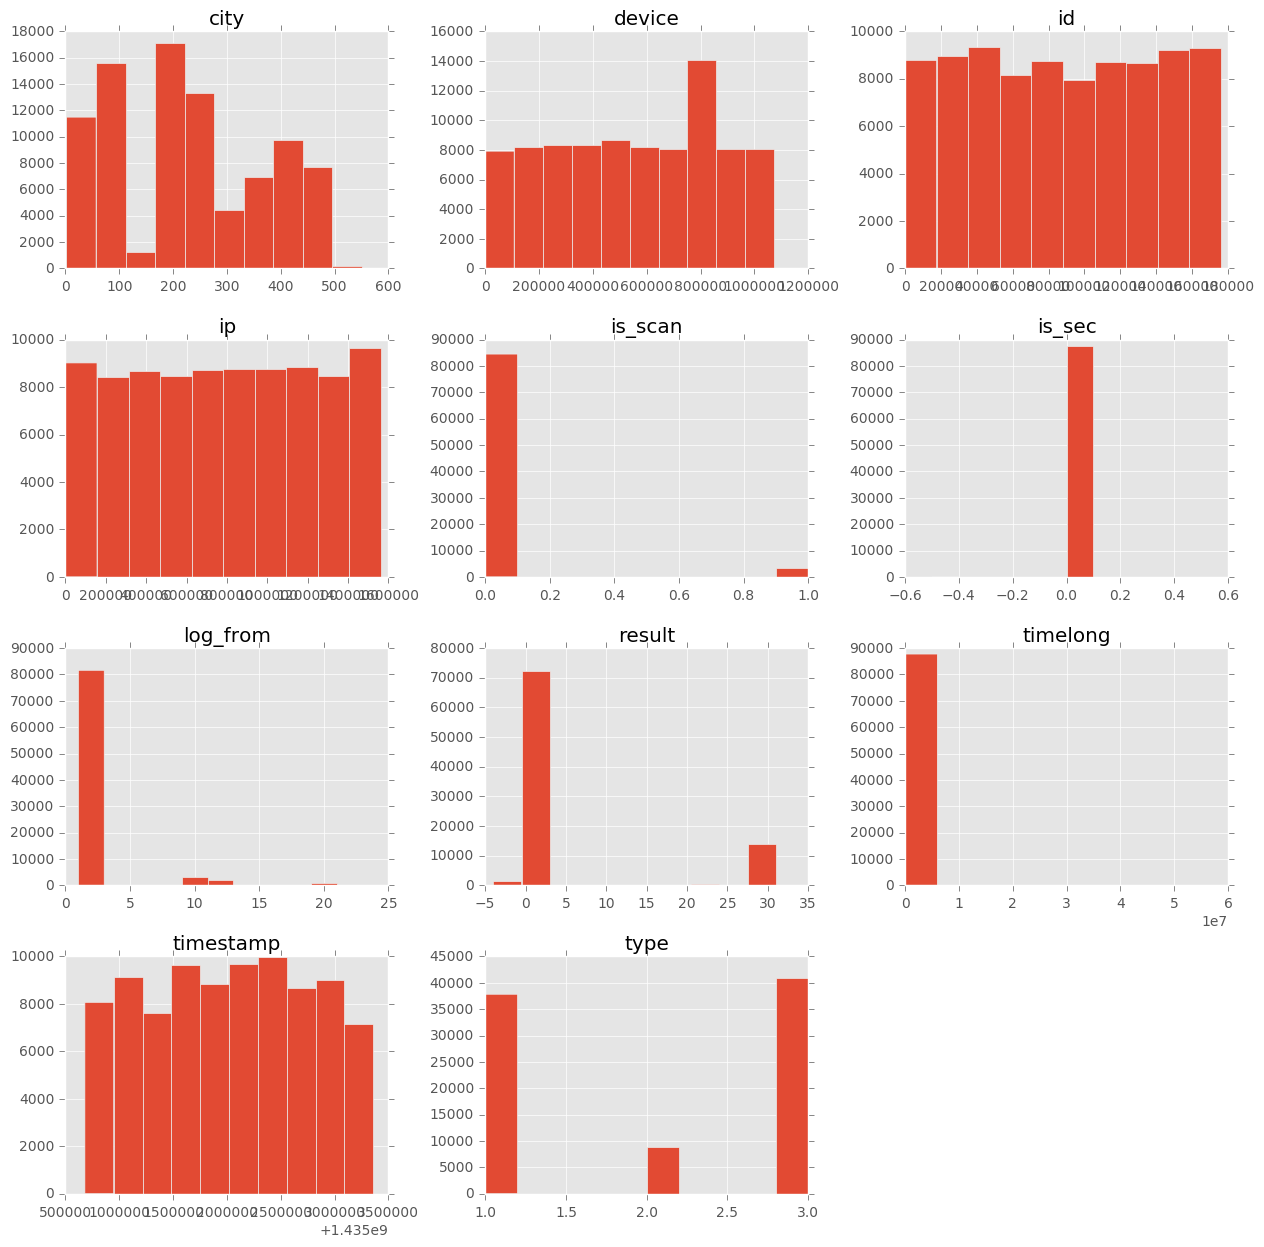

In [27]:
month_sub_trade_df = trade_df[trade_df.time>=np.datetime64('2015-05-01 00:00:00')]
month_sub_trade_df = month_sub_trade_df[month_sub_trade_df.time<np.datetime64('2015-06-01 00:00:00')]
month_sub_trade_df = month_sub_trade_df.sort_values(by='time', ascending = True)
len(trade_test_df['id'].unique()), month_sub_trade_df.shape[0]

# pd.DataFrame.hist(login_test_df, figsize = [15,15])

In [ ]:
1731

In [17]:
trade_test_new_id = trade_test_df[~trade_test_df['id'].isin(trade_df['id'].values)]
trade_test_new_id.shape[0], trade_test_df.shape[0]

(3439, 17875)

In [158]:
later_than = trade_df.time>=np.datetime64('2015-05-01 00:00:00')
earlier_than = trade_df.time<np.datetime64('2015-06-01 00:00:00')
is_risk = trade_df['is_risk']==1
id_equal_5 = trade_df['id']==38375
month_sub_trade_df = trade_df[later_than & earlier_than & is_risk | ~id_equal_5].sort_values(by='time', ascending = True)
len(trade_test_df['id'].unique()), month_sub_trade_df.shape[0]
month_sub_trade_df.shape[0]

132709

In [14]:
# 得到一列不同的值
login_df['result'].unique()
login_df['id'].unique()
len(login_df['city'].unique()), len(login_df.index)
trade_df.count()
merged_login_df.dtypes
# trade_df[trade_df.is_scan==True].sort_values(by='time', ascending = True)  # 174422
trade_df[trade_df.id==54645].sort_values(by='time', ascending = True)  # 174422
# login_df.sort_values(by='time', ascending = True)  # 174422
# time_long_negative_df = merged_login_df[merged_login_df.timelong<0].sort_values(by='time', ascending = True)
# time_long_negative_df
# is_scan_false_df = merged_login_df[merged_login_df.is_scan==False].sort_values(by='time', ascending = True) 
# is_scan_false_df.to_csv('./data/is_scan_false.csv')
# is_scan_false_df['timelong'].max(), is_scan_false_df['timelong'].min()
# len(merged_login_df[merged_login_df.device==835072]['id'].unique())

time     id  is_risk
rowkey                                    
982    2015-01-01 09:06:06  54645        0
6835   2015-01-02 10:33:05  54645        0
6845   2015-01-02 10:33:55  54645        0
6852   2015-01-02 10:34:43  54645        0
6888   2015-01-02 10:39:28  54645        0
6921   2015-01-02 10:46:06  54645        0
6940   2015-01-02 10:48:38  54645        0
6948   2015-01-02 10:49:27  54645        0
6956   2015-01-02 10:50:15  54645        0
6966   2015-01-02 10:51:15  54645        0
7008   2015-01-02 10:55:52  54645        0
7025   2015-01-02 10:58:02  54645        0
7071   2015-01-02 11:03:16  54645        0
7087   2015-01-02 11:05:16  54645        0
7100   2015-01-02 11:06:30  54645        0
7108   2015-01-02 11:07:45  54645        0
7116   2015-01-02 11:09:00  54645        0
7123   2015-01-02 11:10:18  54645        0
7150   2015-01-02 11:13:48  54645        0
7155   2015-01-02 11:15:15  54645        0
7194   2015-01-02 11:20:31  54645        0
7205   2015-01-02 11:22:35  54645        0
7291   2015-01-02 11:33:55  54645        0
7301   2015-01-02 11:35:22  54645        0
7315   2015-01-02 11:37:45  54645        0
7323   2015-01-02 11:38:53  54645        0
7330   2015-01-02 11:39:36  54645        0
7336   2015-01-02 11:40:21  54645        0
7343   2015-01-02 11:41:17  54645        0
7432   2015-01-02 11:54:24  54645        0
7437   2015-01-02 11:55:21  54645        0
7445   2015-01-02 11:56:11  54645        0
7459   2015-01-02 11:57:42  54645        0
7519   2015-01-02 12:08:54  54645        0
7524   2015-01-02 12:09:52  54645        0
7528   2015-01-02 12:10:53  54645        0
7535   2015-01-02 12:11:54  54645        0
7591   2015-01-02 12:21:11  54645        0
16611  2015-01-03 21:48:45  54645        0
16613  2015-01-03 21:49:26  54645        0
16626  2015-01-03 21:52:16  54645        0
16631  2015-01-03 21:53:03  54645        0
16685  2015-01-03 22:00:21  54645        0
16710  2015-01-03 22:02:26  54645        0
16718  2015-01-03 22:03:24  54645        0
56698  2015-01-10 14:54:21  54645        0
56705  2015-01-10 14:55:25  54645        0
56709  2015-01-10 14:56:14  54645        0
56734  2015-01-10 15:00:08  54645        0
56748  2015-01-10 15:01:51  54645        0
56791  2015-01-10 15:06:55  54645        0
56797  2015-01-10 15:07:50  54645        0
56809  2015-01-10 15:09:34  54645        0
56857  2015-01-10 15:16:04  54645        0
56865  2015-01-10 15:17:12  54645        0
56904  2015-01-10 15:23:47  54645        0
56910  2015-01-10 15:24:32  54645        0
56914  2015-01-10 15:25:09  54645        0
56923  2015-01-10 15:25:48  54645        0
56927  2015-01-10 15:26:31  54645        0
56930  2015-01-10 15:27:16  54645        0
56942  2015-01-10 15:28:33  54645        0
56954  2015-01-10 15:29:31  54645        0
56957  2015-01-10 15:30:31  54645        0
56969  2015-01-10 15:32:04  54645        0
56975  2015-01-10 15:32:39  54645        0
57003  2015-01-10 15:38:01  54645        0
57100  2015-01-10 15:51:42  54645        0
57102  2015-01-10 15:52:15  54645        0
57430  2015-01-10 16:43:05  54645        0
57454  2015-01-10 16:46:05  54645        0
57471  2015-01-10 16:48:22  54645        0
57478  2015-01-10 16:49:08  54645        0
57483  2015-01-10 16:49:45  54645        0
57488  2015-01-10 16:50:55  54645        0
57511  2015-01-10 16:55:29  54645        0
57520  2015-01-10 16:57:16  54645        0
57526  2015-01-10 16:58:25  54645        0
57581  2015-01-10 17:07:45  54645        0
57604  2015-01-10 17:12:40  54645        0
57609  2015-01-10 17:13:29  54645        0
57616  2015-01-10 17:14:09  54645        0
57618  2015-01-10 17:14:43  54645        0
57635  2015-01-10 17:16:53  54645        0
57643  2015-01-10 17:19:21  54645        0
57646  2015-01-10 17:20:01  54645        0
58115  2015-01-10 19:06:58  54645        0
58129  2015-01-10 19:09:33  54645        0
58139  2015-01-10 19:10:34  54645        0
58148  2015-01-10 19:12:22  54645        0
63547  2015-01-11 14:43:45  54645        0
63558  2015-01-11 14:45

In [25]:
# merged_login_df[merged_login_df.id==54645].sort_values(by='time', ascending = True)
# merged_login_df.sort_values(by='time', ascending = True)
#merged_login_df[merged_login_df.device==835072].sort_values(by='time', ascending = True)
# merged_login_df[merged_login_df.ip==1256768].sort_values(by='time', ascending = True)
# merged_login_df[merged_login_df.city==238].sort_values(by='time', ascending = True)
# merged_login_df[merged_login_df.device==833972].sort_values(by='time', ascending = True)
# merged_login_df[merged_login_df.result==6].sort_values(by='time', ascending = True)
merged_login_df[merged_login_df.timelong==0.0].sort_values(by='time', ascending = True)
# login_test_df[merged_login_df.device==1059981].sort_values(by='time', ascending = True)

timelong   device  log_from       ip  city  result     timestamp  type      id is_scan is_sec                time
log_id                                                                                                                         
7.775528e+15       0.0   421584         2  1327200   364       1  1.420042e+09     1  113124   False  False 2015-01-01 00:00:15
9.738528e+15       0.0   114594         2   703160    41       1  1.420043e+09     1  158393   False  False 2015-01-01 00:18:11
7.218667e+15       0.0  1011598         2  1311841   447       1  1.420046e+09     1   74386   False  False 2015-01-01 01:07:16
5.476695e+15       0.0   225089         2   283332   299       1  1.420046e+09     1   78226   False  False 2015-01-01 01:09:19
2.988102e+15       0.0   785326         2   212057    63       1  1.420047e+09     1   83987   False  False 2015-01-01 01:36:06
4.059004e+15       0.0   400304         2  1002991   410       1  1.420049e+09     1  170761   False  False 2015-01-01 02:07:29
5.246323e+15       0.0   396038         2   533188   116       1  1.420068e+09     1    3457   False  False 2015-01-01 07:15:43
2.672351e+16       0.0   379782         2   501571   228       1  1.420069e+09     1   24248   False  False 2015-01-01 07:31:50
3.510554e+15       0.0   499956         2    32410   444       1  1.420070e+09     1   37635   False  False 2015-01-01 07:53:19
8.978969e+15       0.0   360296         2  1075075    62      31  1.420072e+09     1   98726   False  False 2015-01-01 08:30:15
7.366912e+15       0.0   835072         2   732327   255      31  1.420072e+09     1    7134   False  False 2015-01-01 08:32:58
3.720794e+16       0.0   857998         2   886637   238       1  1.420073e+09     1   28805   False  False 2015-01-01 08:41:06
2.515941e+16       0.0  1047907         2  1532615   264       1  1.420074e+09     1   48971   False  False 2015-01-01 08:58:15
2.185936e+15       0.0   685387         2  1382171   238       1  1.420075e+09     1  138551   False  False 2015-01-01 09:12:29
8.902406e+15       0.0   910151         2   810053    44       1  1.420075e+09     1  110240   False  False 2015-01-01 09:20:49
1.841116e+16       0.0   509101         2   404825   364       1  1.420075e+09     1  141447   False  False 2015-01-01 09:22:50
4.047544e+16       0.0   700406         2   703160    41       1  1.420077e+09     1  158393   False  False 2015-01-01 09:49:54
4.339174e+16       0.0   426072         2   305052   241       1  1.420078e+09     1  130395   False  False 2015-01-01 10:00:11
8.090444e+15       0.0   835072         2    11347   177       1  1.420079e+09     1  158652   False  False 2015-01-01 10:19:59
3.388173e+15       0.0     8768         2  1327130    21      31  1.420079e+09     1   62993   False  False 2015-01-01 10:22:02
4.977429e+16       0.0   328307         2   895223   400       1  1.420079e+09     1   98117   False  False 2015-01-01 10:24:54
5.525706e+15       0.0   835072         2   296968   410       1  1.420079e+09     1   93267   False  False 2015-01-01 10:26:15
6.935663e+15       0.0   835072         2  1309754   194       1  1.420081e+09     1  108857   False  False 2015-01-01 11:01:31
1.580741e+15       0.0   327010         2   299589    69       1  1.420083e+09     1  173170   False  False 2015-01-01 11:22:36
8.073068e+15       0.0    25160         2  1456400   101       1  1.420084e+09     1  146080   False  False 2015-01-01 11:41:27
4.393686e+16       0.0   484772         2   985682   180       1  1.420085e+09     1   57751   False  False 2015-01-01 11:59:41
8.479213e+14       0.0   835072         2   838706   238       1  1.420085e+09     1  135654   False  False 2015-01-01 12:02:45
5.778273e+15       0.0   209077         2  1137992   194       1  1.420085e+09     1  166837   False  False 2015-01-01 12:05:33
4.512090e+16       0.0   511744         2  1431939   405       1  1.420085e+09     1   69305   False  False 2015-01-01 12:09:32
2.954560e+15       0.0   699808         2   35

In [26]:
merged_login_df_new = merged_login_df.copy()
merged_login_df_new[merged_login_df_new.timelong<=0.0] = np.nan
merged_login_df_new['timelong'].fillna(merged_login_df_new['timelong'], )

In [144]:
merged_login_df['log_from'].unique().size
user_device_count = merged_login_df.groupby(['id', 'device']).size().to_frame().reset_index().groupby('id').size().to_frame().reset_index().rename(columns = {0: 'device_count'})
# user_device_count = merged_login_df.groupby(['id', 'device']).unique().size().to_frame().reset_index().groupby('id').size()
# user_device_count = merged_login_df.groupby(['id', 'device']).size().to_frame().reset_index()
# user_device_count = merged_login_df.groupby(['id']).size()
# user_device_count = merged_login_df.groupby('id').apply(lambda x: x.drop('id', axis=1).drop_duplicates().shape[0]).reset_index()
# user_device_count

[Float64Index([2.61836877304e+15, 9.96973876271e+14,   8.123343164e+15,
               3.26567709338e+14, 6.68465861522e+15, 8.82848128105e+15,
               6.07111941175e+15, 8.52517566418e+15, 3.12014507159e+15,
               5.36790457484e+15,
               ...
               9.13213191875e+14, 7.46396041967e+14, 4.81264669523e+16,
               3.49950306961e+15,  1.3325942479e+16, 5.69804532215e+15,
               9.91704139439e+15, 2.91044357034e+16, 2.16911852734e+16,
               4.30482755156e+14],
              dtype='float64', name='log_id', length=683393),
 Index(['timelong', 'device', 'log_from', 'ip', 'city', 'result', 'timestamp',
        'type', 'id', 'is_scan', 'is_sec', 'time'],
       dtype='object')]

显示某一列数值的分布情况

In [215]:
trade_df.shape, trade_df[trade_df['is_risk']==0].shape, trade_df[trade_df['is_risk']==1].shape
login_df.count()
#trade_df.is_risk.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
trade_df.is_risk.value_counts(normalize=True)
len(merged_login_df['device'].unique())
#login_df.is_sec.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
#login_test_df.is_sec.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
#login_test_df.info()

164532

In [25]:
trade_df_by_id = trade_df['is_risk'].groupby(trade_df['id'])

id_risk_trade   = trade_df[trade_df['is_risk']==1]['id']
id_nonrisk_trade = trade_df[trade_df['is_risk']==0]['id']
checked_id = set(id_risk) & set(id_nonrisk)
len(id_risk), len(id_nonrisk), len(checked_id)

(3643, 129076, 455)

In [147]:
login_df_by_id = login_df.groupby('id').count()
print(login_df_by_id)
#ratio = len(trade_df[trade_df['is_risk']==1])/len(trade_df)
#len(trade_df[trade_df['is_risk']==1]), len(trade_df)
# login_df['id']

        timelong  device  log_from    ip  city  result  timestamp  type  \
id                                                                        
5              4       4         4     4     4       4          4     4   
6              9       9         9     9     9       9          9     9   
13             2       2         2     2     2       2          2     2   
23             3       3         3     3     3       3          3     3   
25             2       2         2     2     2       2          2     2   
28             2       2         2     2     2       2          2     2   
37            20      20        20    20    20      20         20    20   
41            19      19        19    19    19      19         19    19   
52             5       5         5     5     5       5          5     5   
57             5       5         5     5     5       5          5     5   
73             1       1         1     1     1       1          1     1   
74            10      10 

显示trade_df和test_df中id的关系

In [177]:
login_id_set = set(login_df['id'])
login_test_id_set = set(login_test_df['id'])
trade_id_set = set(trade_df['id'])
trade_test_id_set = set(trade_test_df['id'])
trade_test_id_set < (login_test_id_set | login_id_set)
#len(trade_id_set), len(trade_test_id_set)
# set(merged_login_df['id']) == (trade_id_set | trade_test_id_set)
# set(merged_login_df['id']) > trade_id_set, login_id_set > trade_id_set

True

对比显示：对于有危险登录的id和没有危险登录的id，在历史登录记录中ip数量 city数量分布

In [156]:
risk_id = trade_df[trade_df.is_risk==1]['id'].unique()
len(risk_id)
ip_count = login_df[['ip', 'id']].groupby('id').count()
risk_ip_count = ip_count[ip_count.index.isin(risk_id)]
# risk_ip_count['ip'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
nonrisk_ip_count = ip_count[~(ip_count.index.isin(risk_id))]
nonrisk_ip_count['ip'].mean()
trade_test_df[trade_test_df.id.isin(risk_id)]
len(risk_id), list(risk_id)
#login_id_set

(1086,
 ['18138',
  '65489',
  '90970',
  '55986',
  '154625',
  '131624',
  '163711',
  '141236',
  '97238',
  '173999',
  '118753',
  '80396',
  '138243',
  '98286',
  '173410',
  '122113',
  '102090',
  '29224',
  '83331',
  '45779',
  '34225',
  '123981',
  '174435',
  '122223',
  '50477',
  '127540',
  '33748',
  '115114',
  '97310',
  '15525',
  '20682',
  '7134',
  '228',
  '123213',
  '149027',
  '52866',
  '111549',
  '55050',
  '40177',
  '141710',
  '20854',
  '65116',
  '19541',
  '107796',
  '92925',
  '153553',
  '175112',
  '125538',
  '130018',
  '38375',
  '32826',
  '84716',
  '167880',
  '109284',
  '60226',
  '75282',
  '80795',
  '127432',
  '43005',
  '81956',
  '109226',
  '5965',
  '135740',
  '76586',
  '81543',
  '72144',
  '99157',
  '92767',
  '108496',
  '101757',
  '119082',
  '15668',
  '85214',
  '140090',
  '58293',
  '137984',
  '82036',
  '92347',
  '10946',
  '175471',
  '98434',
  '104475',
  '101333',
  '84910',
  '53540',
  '111456',
  '148545',
 

显示某一个数值是否有同一ip多个帐号的情况

In [132]:
id_per_ip_count = login_df[['ip', 'id']].groupby('ip').count()
id_per_ip_count['id'].max()
id_per_ip_count.sort_values(by='id', ascending = False)

id
ip            
359080   20408
847186    1737
1128532    871
1551343    813
1297757    467
877190     455
621905     384
451870     379
743802     331
851032     296
799641     288
1135082    272
65530      241
1491826    234
248586     221
543306     217
1419103    212
1470087    206
1035194    203
965693     202
1427230    200
1385980    193
110109     193
1110972    191
778990     190
379828     187
622198     182
723633     179
942358     179
744802     177
...        ...
756134       1
756137       1
756141       1
756151       1
756166       1
756178       1
136031       1
756193       1
756197       1
756200       1
756079       1
756067       1
136054       1
756063       1
755846       1
136047       1
755862       1
755872       1
755873       1
755928       1
755931       1
755937       1
755949       1
136044       1
755983       1
755989       1
755996       1
756040       1
756054       1
4            1

[226968 rows x 1 columns]

显示device有不同id的情况

In [216]:
device_count = merged_login_df[['device', 'id']].groupby('device').count().sort_values(by='id', ascending = False)
device_count

id
device        
835072   83636
225121    1096
926288     670
427691     590
215189     566
253357     564
511707     532
728381     516
274216     508
1062713    488
832230     419
577143     383
837955     367
683498     352
412258     341
902347     338
700309     335
723158     329
53171      321
995183     313
471550     310
929466     308
897650     307
790106     302
1021091    298
310736     293
644370     289
811073     289
1007850    285
82102      284
655487     282
38585      280
948162     276
973890     272
1050252    267
551653     265
698719     265
100311     259
28541      259
319799     253
155802     252
466653     250
124943     249
652961     247
617266     247
377722     245
320002     242
682102     237
775664     236
73011      234
257133     233
499901     232
927047     232
239194     231
573384     231
884872     231
945812     230
693053     230
564530     229
553826     228
442250     227
1045143    226
116177     226
434706     224
562958     223
981823     222
386        220
295890     219
453840     218
663777     217
836043     217
863963     217
157852     217
523488     212
679244     210
952330     208
544172     208
202221     206
267924     206
305399     206
203136     204
548291     203
270142     202
843267     197
1060902    197
869388     197
1016024    195
662035     194
877895     193
708884     193
586165     192
77681      192
973356     192
517454     190
722128     189
327010     189
361085     188
289061     186
137312     186
421367     186
248750     184
318411     182
776266     182
553623     182
124718     181
809067     181
951607     180
281410     179
1006467    177
967623     176
742014     175
180818     175
97416      174
760564     173
928938     173
344033     172
227162     172
289197     172
176386     169
428252     169
983755     168
993621     168
747880     168
261438     168
400622     167
112544     167
753504     166
631653     166
94951      165
147799     165
659608     164
853889     163
624438     163
726205     163
514207     162
278266     162
605542     161
916944     161
930866     160
434404     158
763154     158
650734     158
410251     158
935306     157
377591     157
157341     156
493506     156
456923     156
776165     156
896149     156
223074     155
68311      154
308347     153
879517     153
1044508    153
281183     153
913870     152
43647      152
284145     152
1037138    151
630248     151
287450     150
629395     150
679013     150
212000     149
720449     149
52294      148
532097     148
1010801    148
780411     148
143663     147
137979     147
538421     147
356906     146
385550     146
955182     146
585839     145
391679     145
181130     145
121407     145
803891     144
674242     144
664621     144
623045     144
234537     144
260913     143
701442     143
435362     143
323096     143
624670     142
174718     142
100529     142
461193     142
237908     141
483922     141
48152      141
78065      140
127849     140
370910     140
513794     140
897425     139
138015     139
743811     139
1058809    138
478981     138
597517     138
754008     138
525131     137
935786     137
667654     137
273966     137
730583     137
550099     137
873283     136
22304      136
705729     136
826433     136
571646     134
952846     134
800504     134
6937       134
511179     133
415347     133
366532     133
918317     133
564157     133
482443     133
53464      133
84123      132
288877     132
658265     132
261595     132
420447     132
63756      131
945147     131
1069032    131
649470     131
983196     131
165132     131
217903     130
488803     130
407574     129
289208     129
295445     129
388315     128
121285     128
135524     128
127803     128
838524     128
141495     127
...        ...
442554       1
442546       1
442545       1
442540       1
440897       1
440891       1
440883       1
439413       1
439410       1
439406       1
439386       1
439372       1
439355       1
439345       1
439334 

显示不同ip对应不同id的情况

In [220]:
ip_count = merged_login_df[['ip', 'id']].groupby('ip').count().sort_values(by='id', ascending = False)
ip_count

id
ip            
359080   20408
847186    1737
1551343    950
1128532    871
451870     575
877190     545
1297757    490
1485916    470
621905     439
743802     429
1007988    322
851032     298
799641     288
1135082    272
1161573    264
723633     260
543306     260
1491826    254
65530      250
248586     247
1470087    229
1419103    227
1035194    220
74636      216
1110972    213
961228     212
379828     207
1427230    206
622198     204
965693     202
292206     197
778990     197
998505     194
110109     193
1385980    193
140381     193
1152540    192
311603     184
169907     183
1329900    181
942358     179
1515319    179
100934     178
744802     177
417        170
301724     169
1363311    167
1450862    167
471402     166
31326      166
1498505    165
1048924    165
884505     162
211765     161
1078386    161
670918     158
1311661    155
1246854    152
1416072    150
354904     150
420524     150
1100303    149
1285049    148
1257024    146
944669     146
1312017    145
1124620    144
1302394    144
206512     144
848996     143
131008     143
249079     143
335163     142
1089041    142
397716     140
87029      139
575870     138
981160     138
1248846    134
854812     133
204244     133
1459619    133
247498     133
776500     132
2642       131
127460     131
72724      130
422418     130
767900     129
1241492    129
421201     128
354438     128
1332570    128
1409549    128
17317      127
765932     127
368997     126
418854     126
1139117    124
306431     124
1020010    123
1223953    123
809287     123
1350982    123
1281649    123
862379     121
1184923    120
836999     120
1393217    118
945392     118
1343219    118
639648     116
581352     115
918106     115
858910     115
923335     113
1129531    113
1278960    113
79234      113
628304     113
50385      113
893880     113
1523189    112
1008491    112
49878      112
232791     112
1522133    111
53447      111
1442249    111
49353      110
430382     110
1118390    109
51343      109
92893      109
1106296    107
1257025    106
1206202    106
1169511    106
1447570    105
1190944    104
1318197    103
308954     103
1315870    102
1494336    102
656620     101
853792     101
1255507    100
1525034    100
1550395    100
689876      99
147007      98
73446       98
722132      97
1022530     97
612195      97
387527      97
593450      96
1055533     96
411288      95
399611      94
557198      94
1536130     94
1292432     94
514622      94
1387385     92
626694      92
168165      92
1195555     92
734082      91
1067296     91
655797      91
543649      91
1084428     90
1151451     90
578287      90
195408      90
1326274     89
1187276     89
711378      89
600063      89
445657      89
1494396     88
1382831     88
1553961     88
554587      88
451288      88
55892       87
788786      87
749773      87
594266      87
154143      87
162447      87
668909      87
694222      86
1167744     86
328187      85
47095       85
539555      85
1142060     85
1539488     85
1355138     85
605112      85
1555116     85
1233994     84
1206368     84
248851      84
951547      83
704914      83
355810      83
898141      83
1506336     82
254132      82
804671      82
944393      82
883579      81
1327224     81
933456      81
1280013     81
348985      80
113046      80
37955       80
744823      80
270380      80
1258364     80
24673       80
648111      80
1244071     79
140754      79
349021      79
375374      79
167483      79
76103       79
273652      79
456659      79
153838      78
1240803     78
1198836     78
482991      78
1324848     78
986790      78
1081614     78
92912       78
106322      77
513162      77
492494      77
1427145     77
1139015     77
1496288     77
256001      77
676484      77
...        ...
904525       1
359704       1
904537       1
359691       1
359689       1
904545       1
359682       1
904556       1
359678       1
904561       1
359663       1
904588       1
904591       1
904597       1
359660 

In [ ]:
对比显示risk_id和non_risk登录result分布情况

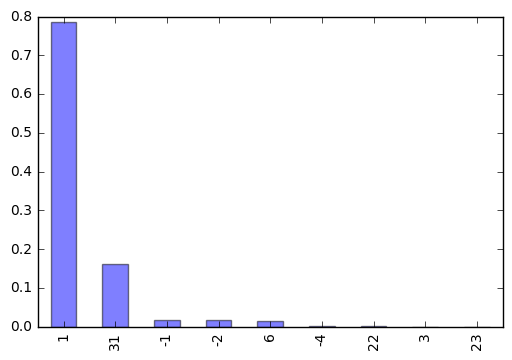

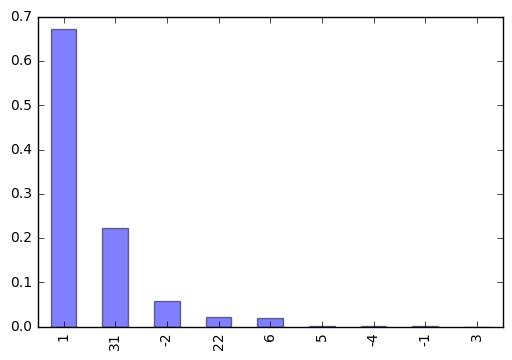

In [3]:
# result_count = merged_login_df['result'].value_counts(normalize=True)
non_risk_login_df['result'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.show()
risk_login_df['result'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.show()
# risk_ip_count = ip_count[ip_count.index.isin(risk_id)]
# risk_ip_count['ip'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
# nonrisk_ip_count = ip_count[~(ip_count.index.isin(risk_id))]

In [ ]:
对比显示risk_id和non_risk登录log_from分布情况

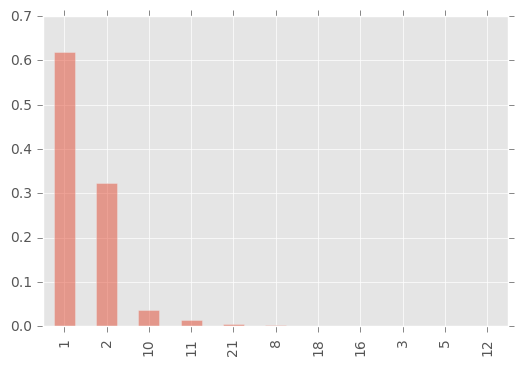

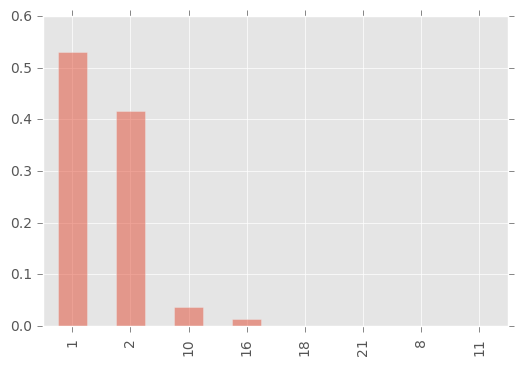

In [22]:

non_risk_login_df['log_from'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.show()
risk_login_df['log_from'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.show()

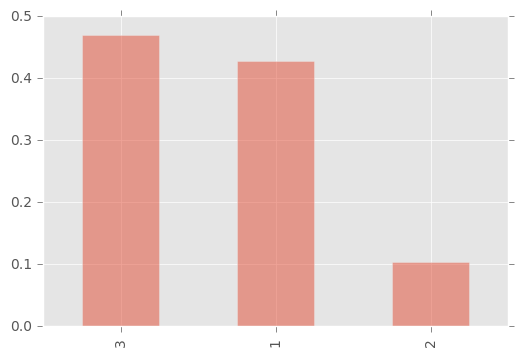

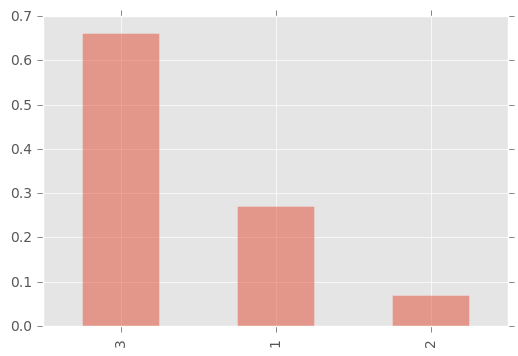

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001AF01B70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001D5490B8>]], dtype=object)

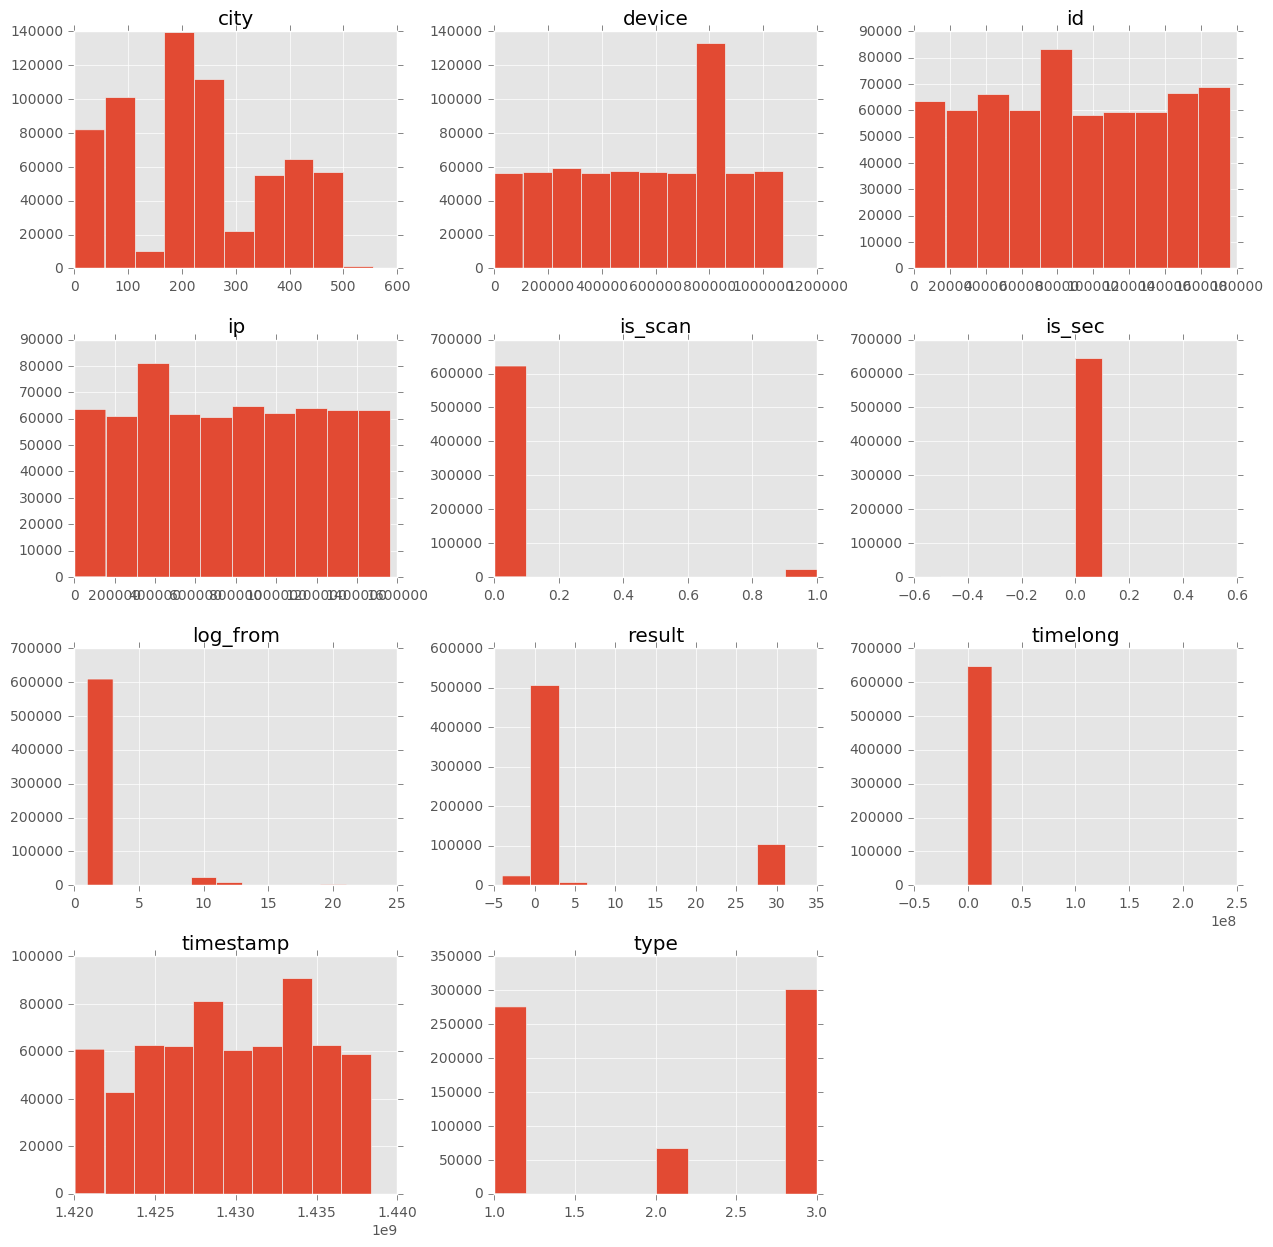

In [25]:
non_risk_login_df['type'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.show()
risk_login_df['type'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.show()
pd.DataFrame.hist(non_risk_login_df, figsize = [15,15])

In [337]:
id_count = trade_df['id'].groupby(trade_df['id']).count().sort_values(ascending = False)
id_count
#trade_df['result'].groupby(trade_df['id'])

id
54645     1095
49567      654
42908      566
74148      413
59055      367
54529      312
68595      282
97513      281
66294      258
115201     242
120335     241
92529      224
17557      220
36076      197
113760     182
165183     180
135767     146
101777     145
58635      144
83860      139
147174     135
96292      134
134720     128
39387      128
37279      127
123284     126
21283      122
115578     115
99470      111
38066      111
112171     108
151823     106
77170      105
154260     103
52893      102
120784     101
171345     101
78572      100
141674      98
95913       98
131113      96
135490      96
75425       94
23909       94
127282      94
122703      93
118933      92
132044      91
30346       91
79730       91
160524      91
158045      90
103902      87
130930      86
95458       85
85435       83
154650      83
126066      83
156796      82
58551       82
126810      82
37160       82
42197       81
141953      79
140111      79
73272       78
152127 

In [322]:
non_risk_login_df[non_risk_login_df.device==835072]
risk_login_df[risk_login_df.device==835072]

timelong  device  log_from       ip  city  result  \
log_id                                                            
1.934557e+16       6.0  835072        11  1067892   374       1   
9.835055e+15    3621.0  835072         1  1203943   194      31   
8.592159e+15   16447.0  835072         1  1506536   358      31   
3.383243e+15    7000.0  835072         2  1069804     8       1   
4.429197e+16   10000.0  835072         2  1069804     8      31   
4.982060e+15    5736.0  835072         1  1463291   492      -2   
1.684749e+15    2890.0  835072         1  1140840   492      31   
2.913852e+16    4498.0  835072         1   604978   492      31   
4.035165e+16    5121.0  835072         1    58475   194       1   
2.364404e+16    7000.0  835072         2   112229    21       1   
9.837576e+15    7000.0  835072         2   112229    21       1   
1.796303e+16    7000.0  835072         2   112229    21       1   
1.897382e+16    1338.0  835072         1  1426307   194      -2   
7.667209e+15    4853.0  835072         1   702321   364       1   
1.230005e+16   18119.0  835072         1  1111654   364       1   
7.634997e+15   17611.0  835072         1    68606   364       1   
2.341429e+16   17348.0  835072         1    20670   364       1   
3.792220e+15    2536.0  835072         1   508674   364      -2   
8.155344e+15    4000.0  835072         2  1527510   364       1   
3.122340e+16  320237.0  835072         1   922134   168       1   
1.224525e+16    8673.0  835072         1   663523   168       1   
7.924289e+15   22547.0  835072         1    47219   349      31   
5.751681e+15    2422.0  835072         1  1327587    62      -2   
1.935465e+16    3000.0  835072         2  1090853    62       1   
1.382285e+16    2000.0  835072         2   376934    62       1   
9.345110e+15    1000.0  835072         2   693379    62       1   
5.990132e+15    2730.0  835072         1   521260    71       1   
8.305271e+15    2235.0  835072         1   802994    70       1   
8.995250e+15    9000.0  835072         2   557402    68       1   
3.673171e+16    7000.0  835072         2   557402    68       1   
1.412998e+16    6000.0  835072         2   557402    68       1   
7.831688e+15   10000.0  835072         2  1219766    68       1   
6.605324e+15   10000.0  835072         2  1219766    68       1   
6.460312e+15   10000.0  835072         2    33662    68       1   
9.656909e+15    5000.0  835072         2   528898   447      31   
6.254795e+15    2000.0  835072         2   528898   447      31   
4.386482e+15    2000.0  835072         2    11832   255      31   
7.106875e+15    4000.0  835072         2    11832   255      31   
6.925598e+15    4227.0  835072         1   275947   488      31   
9.568892e+15    7000.0  835072         2   892977    70       1   
3.362627e+15    8000.0  835072         2  1036239     9       1   
5.078914e+15   10000.0  835072         2  1036239     9       1   
1.726228e+15   19000.0  835072         2  1036239     9      31   
5.782680e+15   11000.0  835072         2  1036239     9       1   
7.504494e+14   12000.0  835072         2  1036239     9      31   
9.866135e+15    2000.0  835072         2   134271   386       1   
8.182746e+15    3000.0  835072         2   512794   386       1   
4.692914e+14    8249.0  835072         1   789322    21      -2   
7.306994e+15    8000.0  835072         2  1320220    21       1   
5.309571e+15    4000.0  835072         2  1320220    21       1   
4.701739e+16    8000.0  835072         2  1505091   203       6   
4.233778e+16    6000.0  835072         2  1329120    68       1   
6.689603e+15    8000.0  835072         2  1329120    68       1   
3.623777e+14    7000.0  835072         2  1329120    68       1   
9.355011e+15    6000.0  835072         2  1329120    68       1   
2.845643e+16    8000.0  835072         2   927203    68       1   
4.081100e+15    7000.0  835072         2   927203    68      31   
1.816024e+16  373786.0  835072         1  1388679   420      

In [460]:
def check_whether_same_day(time1, time2):
    time1 = pd.DatetimeIndex([time1])
    time2 = pd.DatetimeIndex([time2])
    year1, month1, day1 = time1.year[0], time1.month[0], time1.day[0]
    year2, month2, day2 = time2.year[0], time2.month[0], time2.day[0]
    print('year1 month1 day1 ', year1, month1, day1)
    print('year2 month2 day2 ', year2, month2, day2)
    same_day = (year1==year2 and month1==month2 and day1==day2)
    return 1 if same_day else 0

In [535]:
login_sub_df = merged_login_df.sort_values(by='time')
trade_time = login_sub_df['time'].values[29]
trade_time_1 = login_sub_df['time'].values[-10]

user_id = login_sub_df['id'].values[-10]

print('trade_time is ', trade_time, trade_time_1)
year = pd.DatetimeIndex([trade_time]).year[0]
month = pd.DatetimeIndex([trade_time]).month[0]
day = pd.DatetimeIndex([trade_time]).day[0]

print('check_whether_same_day is ', check_whether_same_day(trade_time, trade_time_1))

train_df = pd.read_csv('./data/train_data.csv', index_col='rowkey')

trade_time is  2015-01-01T00:14:13.000000000 2015-07-31T23:57:36.000000000
year1 month1 day1  2015 1 1
year2 month2 day2  2015 7 31
check_whether_same_day is  0


In [ ]:
判断一天之中某个时间段内登录是否为risk的概率比较大

In [644]:
trade_new_df = pd.read_csv('./data/Risk_Detection_Qualification/t_trade.csv', 
                           index_col='rowkey', parse_dates=['time'], 
                           date_parser=dateparse)
time_series = pd.DatetimeIndex(trade_new_df['time'])
trade_new_df['hour'] = time_series.hour
trade_new_df['minute'] = time_series.minute

sub_trade_new_df = trade_new_df.copy()
sub_trade_new_df = sub_trade_new_df[sub_trade_new_df.hour>=1] 
sub_trade_new_df = sub_trade_new_df[sub_trade_new_df.hour<=7]


def get_ratio(hour_start, hour_end):
    global trade_new_df
    sub_trade_new_df = trade_new_df.copy()
    sub_trade_new_df = sub_trade_new_df[sub_trade_new_df.hour>=hour_start] 
    sub_trade_new_df = sub_trade_new_df[sub_trade_new_df.hour<=hour_end]
    print(sub_trade_new_df['is_risk'].value_counts(normalize=True), 
          'len is ', sub_trade_new_df[sub_trade_new_df.is_risk==1].shape[0])

sub_trade_new_df.shape[0], trade_new_df.shape[0]
get_ratio(6, 7)
print('all day long is: ', trade_new_df['is_risk'].value_counts(normalize=True), 'len is ', trade_new_df[trade_new_df.is_risk==1].shape[0])


0    0.961576
1    0.038424
Name: is_risk, dtype: float64 len is  156
all day long is:  0    0.972551
1    0.027449
Name: is_risk, dtype: float64 len is  3643


In [72]:
df_df = pd.DataFrame({'A': ['one', 'two', 'one', 'three', 'two', 'three'],
                      'B': ['one1', 'two1', 'one1', 'one1', 'two1', 'one1'],
                      'C': [2, 4, 9, 10, 15, 21],
                      'D': [4, 5, 6, 9, 45, 27]})

df_df.drop('B', axis=1, inplace=True)
df_df

A   C   D
0    one   2   4
1    two   4   5
2    one   9   6
3  three  10   9
4    two  15  45
5  three  21  27

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000005E10EB8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000011C8D5F8>]], dtype=object)

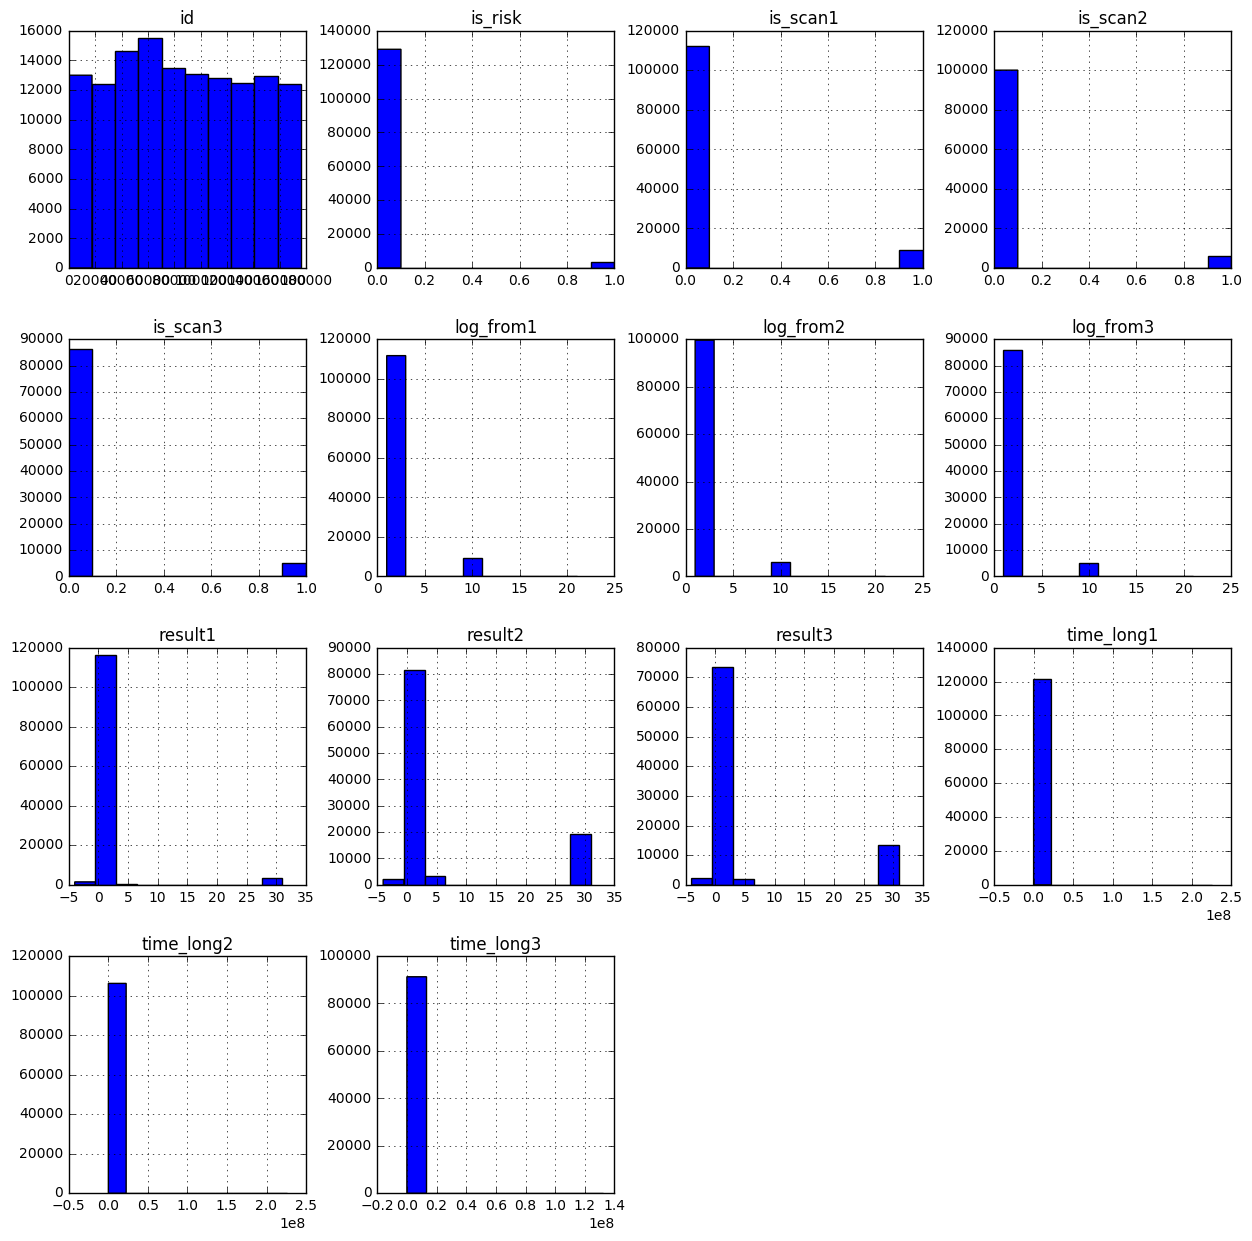

In [20]:
#train_df = pd.read_csv('./data/train_data.csv', index_col='rowkey')
last3_login_info_df = pd.read_csv('./features/train/last3_login_info.csv', index_col='rowkey')
login_result_value_count = last3_login_info_df['result1'].value_counts(dropna=False)
is_risk_login = last3_login_info_df[last3_login_info_df.is_risk==1]
risk_result_value_counts = is_risk_login['result1'].value_counts(dropna=False)
# risk_result_value_counts, login_result_value_count
# (risk_result_value_counts/login_result_value_count).plot(kind='bar', alpha=0.5)
pd.DataFrame.hist(last3_login_info_df, figsize = [15,15])


#test_outcomes_df = pd.read_csv('./data/submission/test_predicted_outcomes.csv', index_col='rowkey')

In [88]:
train_df[train_df.ty==24445]
test_outcomes_df.where(test_outcomes_df.is_risk==1)

predicted_risk  is_risk     id
rowkey                                
944052               0        1  24445

In [23]:
broken_df = pd.read_csv('./data/submission/submission_0.61272.csv')
broken_df[broken_df.is_risk==1]


row_key  is_risk
177       1731        1
178       1738        1
181       1748        1
204       1946        1
581       5170        1
582       5172        1
583       5176        1
605       5304        1
606       5309        1
607       5311        1
608       5312        1
1533     14433        1
1617     14992        1
1655     15331        1
1662     15392        1
2002     18388        1
2004     18415        1
2024     18487        1
2046     18739        1
2047     18741        1
2048     18743        1
2049     18746        1
2051     18753        1
2622     24699        1
2623     24702        1
2624     24704        1
3858     37141        1
4147     39847        1
4421     42105        1
4422     42113        1
4423     42114        1
5026     48099        1
5207     49970        1
5472     52581        1
5474     52591        1
5475     52597        1
5476     52598        1
5481     52622        1
5484     52641        1
5485     52642        1
5486     52650        1
5487     52651        1
5563     53568        1
5595     53912        1
5596     53923        1
5616     54091        1
5656     54534        1
5667     54674        1
5700     54958        1
5996     57975        1
6484     63102        1
6499     63242        1
6825     66622        1
6863     66901        1
6895     67116        1
6908     67214        1
7285     71225        1
7594     74214        1
7595     74215        1
7596     74216        1
7597     74217        1
7598     74218        1
8081     79372        1
8083     79383        1
8268     81295        1
8984     88079        1
9153     89819        1
9286     91113        1
9301     91216        1
9311     91255        1
9313     91269        1
9320     91301        1
9965     97825        1
10032    98486        1
10359   101360        1
10362   101370        1
10733   104897        1
10789   105229        1
11160   108872        1
11316   110392        1
11317   110402        1
11319   110425        1
11321   110429        1
11547   112913        1
11997   117501        1
12877   127356        1
13479   133540        1
14156   140586        1
14157   140588        1
14160   140609        1
14161   140611        1
14841   147083        1
14843   147085        1
14844   147086        1
14845   147088        1
14846   147089        1
14847   147090        1
14848   147091        1
14849   147092        1
15060   148952        1
15069   149013        1
15071   149017        1
15198   150324        1
15229   150631        1
15293   151205        1
15516   153307        1
15729   155341        1
16151   159149        1
16703   164787        1
16704   164789        1
16705   164790        1
16706   164791        1
16707   164792        1
16710   164799        1
16711   164801        1
16712   164802        1
16713   164819        1
16714   164820        1
16715   164821        1
16716   164822        1
16717   164825        1
16718   164828        1
16720   164833        1
16721   164835        1
17029   167865        1
17539   172812        1